#### import required packages

In [1]:
import numpy as np
import pandas as pd

In [2]:
from sklearn.preprocessing import MinMaxScaler

#### Loading Data

In [3]:
df = pd.read_csv("files/homeprices_banglore.csv")
df.head()

,area,bedrooms,price
0,1056,2,39.07
1,2600,4,120.00
2,1440,3,62.00
3,1521,3,75.00
4,1200,2,51.00


###### scaler transformer defination

In [4]:
sx = MinMaxScaler()
sy = MinMaxScaler()

#### Scaling Data

In [5]:
X_scaled = sx.fit_transform(df.drop("price", axis= 'columns'))
y_scaled = sy.fit_transform(df["price"].values.reshape(df.shape[0],1))

In [6]:
X_scaled

array([[0.08827586, 0.25      ],
       [0.62068966, 0.75      ],
       [0.22068966, 0.5       ],
       [0.24862069, 0.5       ],
       [0.13793103, 0.25      ],
       [0.12758621, 0.25      ],
       [0.6662069 , 0.75      ],
       [0.86206897, 0.75      ],
       [0.17586207, 0.5       ],
       [1.        , 1.        ],
       [0.34482759, 0.5       ],
       [0.68448276, 0.75      ],
       [0.06896552, 0.25      ],
       [0.10344828, 0.25      ],
       [0.5       , 0.5       ],
       [0.12931034, 0.25      ],
       [0.13103448, 0.5       ],
       [0.25517241, 0.5       ],
       [0.67931034, 0.5       ],
       [0.        , 0.        ]])

In [7]:
y_scaled

array([[0.05237037],
       [0.65185185],
       [0.22222222],
       [0.31851852],
       [0.14074074],
       [0.04444444],
       [0.76296296],
       [0.91111111],
       [0.13333333],
       [1.        ],
       [0.37037037],
       [0.8       ],
       [0.04444444],
       [0.05925926],
       [0.51111111],
       [0.07407407],
       [0.11851852],
       [0.20740741],
       [0.51851852],
       [0.        ]])

### Implemating general purpose Batch Gradient Descent

In [8]:
def bgd(X, y_true, epochs, learning_rate= 0.01):
    number_of_feature = X.shape[1]  #no. of columns
    w = np.ones(shape= (number_of_feature,))   # ndim = 1D--> rows
    b = 0
    total_sample = X.shape[0]

    # compute derivative and update the weights and bias
    # prediction based on current weights and dimention
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        
        y_predicted = np.dot(w, X.T) + b  #bcz w = 1d(1,n) and X= 2d(m,n) n= no. of feature , m = no. of sample
                                        # y_predicted shape = (1,m) and y_true= (m,1)
        
        
    
        wd = -(2/total_sample)*(X.T.dot(y_true - y_predicted))
        bd = -(2/total_sample)*np.sum(y_true - y_predicted)
        
        w = w - learning_rate * wd
        b = b - learning_rate * bd
        
        y_predicted = np.dot(w, X.T) + b
        cost = np.mean(np.square(y_true - y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"epoch: {i}, w: {w}, b: {b}, loss: {cost}")
            
    return w, b, cost, cost_list, epoch_list
        
        
    
    

In [9]:
w, b, cost, cost_list, epocch_list = bgd(X_scaled, y_scaled.reshape(y_scaled.shape[0],), 1000,)

epoch: 0, w: [0.99551317 0.99445655], b: -0.009603223499361428, loss: 0.26276673457254596
epoch: 10, w: [0.95630831 0.94626642], b: -0.09163530752945695, loss: 0.15766501024727825
epoch: 20, w: [0.92561534 0.90895369], b: -0.1526797697123304, loss: 0.09750510556972952
epoch: 30, w: [0.9013738  0.87987065], b: -0.19789162051248474, loss: 0.0629845575622148
epoch: 40, w: [0.88202714 0.8570175 ], b: -0.23116355287977375, loss: 0.04309454988915444
epoch: 50, w: [0.86639945 0.8388837 ], b: -0.2554349736249456, loss: 0.03155627438599145
epoch: 60, w: [0.85360224 0.82432823], b: -0.27292538144121864, loss: 0.02478853208737036
epoch: 70, w: [0.8429641  0.81248913], b: -0.2853106120900698, loss: 0.020748623996523288
epoch: 80, w: [0.83397757 0.80271516], b: -0.2938559373058315, loss: 0.01827129260602433
epoch: 90, w: [0.826259   0.79451428], b: -0.2995165799588363, loss: 0.016691709532086003
epoch: 100, w: [0.81951826 0.78751463], b: -0.30301362222683875, loss: 0.015630459085441334
epoch: 110, 

In [10]:
w,b,cost

(array([0.66469087, 0.60541671]), -0.17792104056392882, 0.004863885249279305)

##### ploting convergence of wiegths w.r.t epoch and cost

<Figure size 1440x1296 with 0 Axes>

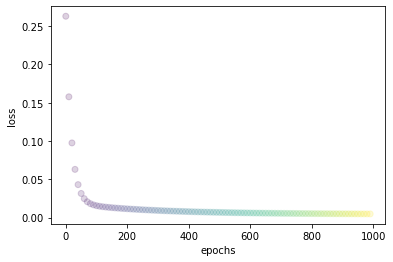

<Figure size 1440x1296 with 0 Axes>

In [11]:
import matplotlib.pyplot as plt
plt.scatter(epocch_list, cost_list, alpha= 0.18, c= epocch_list)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.figure(figsize=(20,18))

# SGD

In [12]:
def sgd(X, y_true, epochs, learning_rate= 0.01):
    from random import randint
    number_of_feature = X.shape[1]  #no. of columns
    w = np.ones(shape= (number_of_feature,))   # ndim = 1D--> rows
    b = 0
    total_sample = X.shape[0]

    # compute derivative and update the weights and bias
    # prediction based on current weights and dimention
    cost_list = []
    epoch_list = []
    
    for i in range(epochs):
        random_index = randint(0, X.shape[0]-1)
        X_sample = X[random_index]
        y_sample = y_true[random_index]
        
        y_predicted = np.dot(w, X_sample.T) + b  #bcz w = 1d(1,n) and X= 2d(m,n) n= no. of feature , m = no. of sample
                                        # y_predicted shape = (1,m) and y_true= (m,1)
        
        
    
        wd = -(2/total_sample)*(X_sample.T.dot(y_sample - y_predicted))
        bd = -(2/total_sample)*np.sum(y_sample - y_predicted)
        
        w = w - learning_rate * wd
        b = b - learning_rate * bd
        
        y_predicted = np.dot(w, X_sample.T) + b
        cost = np.mean(np.square(y_sample - y_predicted))
        
        if i%10 == 0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"epoch: {i}, w: {w}, b: {b}, loss: {cost}")
            
    return w, b, cost, cost_list, epoch_list

In [13]:
w_sgd, b_sgd, cost_sgd, cost_list_sgd, epoch_list_sgd = sgd(X_scaled, y_scaled.reshape(y_scaled.shape[0],), 3000,)

epoch: 0, w: [0.99955382 0.99946087], b: -0.0007188378033205618, loss: 0.5147168288867061
epoch: 10, w: [0.99758843 0.99699944], b: -0.005120902905908117, loss: 0.07830010888529347
epoch: 20, w: [0.99533903 0.99420167], b: -0.009855329378317472, loss: 0.06911363084780178
epoch: 30, w: [0.99327811 0.99172571], b: -0.014457252411492271, loss: 0.24308920006111
epoch: 40, w: [0.99161675 0.98929336], b: -0.01898718746187376, loss: 0.23724396818768098
epoch: 50, w: [0.98976286 0.98696335], b: -0.023589732808455617, loss: 0.15796566955100014
epoch: 60, w: [0.98810007 0.98502479], b: -0.026819369686558816, loss: 0.07460235399100876
epoch: 70, w: [0.98566485 0.9820531 ], b: -0.031380838014913606, loss: 0.14913797916033525
epoch: 80, w: [0.98461547 0.98045699], b: -0.03488755799575639, loss: 0.18019442915766667
epoch: 90, w: [0.98352013 0.97878297], b: -0.038213949980953725, loss: 0.04056155788719184
epoch: 100, w: [0.98236783 0.97728784], b: -0.041504504901731486, loss: 0.06542018753104353
epoc

In [14]:
w_sgd, b_sgd, cost_sgd

(array([0.79719188, 0.76662007]), -0.30522340672260595, 0.001185324600200688)

#### sgd cost coversion

Text(0, 0.5, 'loss')

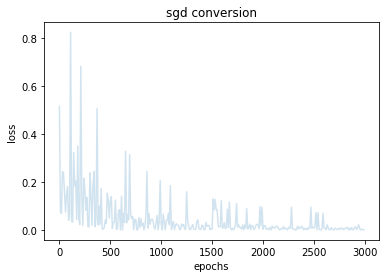

In [15]:
plt.plot(epoch_list_sgd, cost_list_sgd,  alpha= 0.2)
plt.title("sgd conversion")
plt.xlabel("epochs")
plt.ylabel("loss")

# Mini- Batch Gradient Descent

In [41]:
def mini_batch_gradient_descent(X, y_true, epochs = 100, batch_size = 5, learning_rate = 0.01):
    
    number_of_features = X.shape[1]
    # numpy array with 1 row and columns equal to number of features. In 
    # our case number_of_features = 3 (area, bedroom and age)
    w = np.ones(shape=(number_of_features)) 
    b = 0
    total_samples = X.shape[0] # number of rows in X
    
    if batch_size > total_samples: # In this case mini batch becomes same as batch gradient descent
        batch_size = total_samples
        
    cost_list = []
    epoch_list = []
    
    num_batches = int(total_samples/batch_size)
    
    for i in range(epochs):    
        random_indices = np.random.permutation(total_samples)
        X_tmp = X[random_indices]
        y_tmp = y_true[random_indices]
        
        for j in range(0,total_samples,batch_size):
            Xj = X_tmp[j:j+batch_size]
            yj = y_tmp[j:j+batch_size]
            y_predicted = np.dot(w, Xj.T) + b
            
            w_grad = -(2/len(Xj))*(Xj.T.dot(yj-y_predicted))
            b_grad = -(2/len(Xj))*np.sum(yj-y_predicted)
            
            w = w - learning_rate * w_grad
            b = b - learning_rate * b_grad
                
            cost = np.mean(np.square(yj-y_predicted)) # MSE (Mean Squared Error)
        
        if i%10==0:
            cost_list.append(cost)
            epoch_list.append(i)
            print(f"Epoch: {i}, w: {w}, b: {b}, loss: {cost}")
        
    return w, b, cost, cost_list, epoch_list

w, b, cost, cost_list, epoch_list = mini_batch_gradient_descent(
    X_scaled,
    y_scaled.reshape(y_scaled.shape[0],),
    epochs = 120,
    batch_size = 5
)
w, b, cost

Epoch: 0, w: [0.98260675 0.97859399], b: -0.036850920102393214, loss: 0.16103246210952166
Epoch: 10, w: [0.87686197 0.85097216], b: -0.23959365655262274, loss: 0.04782588439621938
Epoch: 20, w: [0.83145849 0.80003806], b: -0.2958158686271772, loss: 0.005873608584218545
Epoch: 30, w: [0.80646573 0.77442487], b: -0.3056246790146978, loss: 0.018588297011721454
Epoch: 40, w: [0.78904066 0.75769731], b: -0.30079922285389665, loss: 0.018140577734744662
Epoch: 50, w: [0.77481565 0.74428251], b: -0.29198172935337774, loss: 0.015200699220250616
Epoch: 60, w: [0.76239988 0.73250869], b: -0.28221382950452445, loss: 0.011925189463676933
Epoch: 70, w: [0.75138007 0.72186812], b: -0.27237346106202365, loss: 0.012933432705158229
Epoch: 80, w: [0.74138346 0.71193109], b: -0.2631446904998051, loss: 0.023309658186502418
Epoch: 90, w: [0.73223516 0.70252685], b: -0.25464495104171514, loss: 0.0032789254282497814
Epoch: 100, w: [0.72393912 0.69370864], b: -0.24669981257401222, loss: 0.0134939870531854
Epoc

(array([0.75081252, 0.42180873]), -0.11799952750254722, 0.0018784815106460018)

#####  mini-batch gradiet descent converge

Text(0.5, 1.0, 'Mini-Batch Gradient Descent')

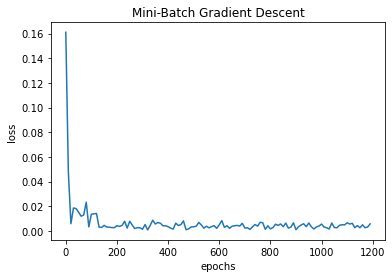

In [42]:
plt.plot(epoch_list, cost_list)
plt.xlabel("epochs")
plt.ylabel("loss")
plt.title("Mini-Batch Gradient Descent")

In [47]:
np.argmin(cost_list)

32

In [56]:
epoch_list[np.argmin(cost_list)]  
# -->  Epoch: 320, w: [0.65996602 0.57962406], b: -0.1628544190623191, loss: 0.0008276041662598217

320

In [57]:
min(cost_list)

0.0008276041662598217

#####  Sample in mini batch full scale 

In [52]:
from numpy.random import permutation
id = permutation(len(X_scaled))
id


array([ 5,  7,  1, 19,  0,  4, 16, 18, 14,  8,  3, 17,  6,  9, 12,  2, 10,
       13, 11, 15])

In [53]:
X_scaled[id]

array([[0.12758621, 0.25      ],
       [0.86206897, 0.75      ],
       [0.62068966, 0.75      ],
       [0.        , 0.        ],
       [0.08827586, 0.25      ],
       [0.13793103, 0.25      ],
       [0.13103448, 0.5       ],
       [0.67931034, 0.5       ],
       [0.5       , 0.5       ],
       [0.17586207, 0.5       ],
       [0.24862069, 0.5       ],
       [0.25517241, 0.5       ],
       [0.6662069 , 0.75      ],
       [1.        , 1.        ],
       [0.06896552, 0.25      ],
       [0.22068966, 0.5       ],
       [0.34482759, 0.5       ],
       [0.10344828, 0.25      ],
       [0.68448276, 0.75      ],
       [0.12931034, 0.25      ]])

In [54]:
y_scaled[id]

array([[0.04444444],
       [0.91111111],
       [0.65185185],
       [0.        ],
       [0.05237037],
       [0.14074074],
       [0.11851852],
       [0.51851852],
       [0.51111111],
       [0.13333333],
       [0.31851852],
       [0.20740741],
       [0.76296296],
       [1.        ],
       [0.04444444],
       [0.22222222],
       [0.37037037],
       [0.05925926],
       [0.8       ],
       [0.07407407]])

In [77]:
# let we want to feed 5 data at ones

total_sample = X_scaled.shape[0]
batch_size = 5
new_batches = int(total_sample/batch_size)

In [76]:
for j in range(0,total_sample,batch_size):
    print(j, j+batch_size)
    X_batch = X_scaled[j: j+batch_size]
    y_batch = y_scaled[j: j+batch_size]
    print(X_batch,)
    print(y_batch, end="\n\n\n\n")

0 6
[[0.08827586 0.25      ]
 [0.62068966 0.75      ]
 [0.22068966 0.5       ]
 [0.24862069 0.5       ]
 [0.13793103 0.25      ]
 [0.12758621 0.25      ]]
[[0.05237037]
 [0.65185185]
 [0.22222222]
 [0.31851852]
 [0.14074074]
 [0.04444444]]



6 12
[[0.6662069  0.75      ]
 [0.86206897 0.75      ]
 [0.17586207 0.5       ]
 [1.         1.        ]
 [0.34482759 0.5       ]
 [0.68448276 0.75      ]]
[[0.76296296]
 [0.91111111]
 [0.13333333]
 [1.        ]
 [0.37037037]
 [0.8       ]]



12 18
[[0.06896552 0.25      ]
 [0.10344828 0.25      ]
 [0.5        0.5       ]
 [0.12931034 0.25      ]
 [0.13103448 0.5       ]
 [0.25517241 0.5       ]]
[[0.04444444]
 [0.05925926]
 [0.51111111]
 [0.07407407]
 [0.11851852]
 [0.20740741]]



18 24
[[0.67931034 0.5       ]
 [0.         0.        ]]
[[0.51851852]
 [0.        ]]





In [73]:
total_sample

20

In [78]:
len(X_scaled)

20

In [79]:
len(X_batch)

2